In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose


This dataset provides comprehensive monthly and annual electric power operational data from the U.S. Energy Information Administration (EIA). It covers the period from 2015 to 2024 and includes detailed metrics on electric power generation, consumption, costs, and emissions. The dataset is designed to support analysis and research into the efficiency and environmental impact of electric power operations across various states and sectors in the United States.

In [2]:
df = pd.read_csv('./electricity_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   period               5000 non-null   object
 1   location             5000 non-null   object
 2   stateDescription     5000 non-null   object
 3   sectorid             5000 non-null   int64 
 4   sectorDescription    5000 non-null   object
 5   fueltypeid           5000 non-null   object
 6   fuelTypeDescription  5000 non-null   object
dtypes: int64(1), object(6)
memory usage: 273.6+ KB


In [4]:
df.head()

,period,location,stateDescription,sectorid,sectorDescription,fueltypeid,fuelTypeDescription
0,2024-05,MI,Michigan,2,IPP Non-CHP,NGO,natural gas & other gases
1,2024-05,LA,Louisiana,2,IPP Non-CHP,NGO,natural gas & other gases
2,2024-05,LA,Louisiana,2,IPP Non-CHP,NG,natural gas
3,2024-05,LA,Louisiana,2,IPP Non-CHP,HYC,conventional hydroelectric
4,2024-05,NJ,New Jersey,2,IPP Non-CHP,OBW,biomass


In [5]:
df.shape

(5000, 7)

In [6]:
df.isnull().sum()

period                 0
location               0
stateDescription       0
sectorid               0
sectorDescription      0
fueltypeid             0
fuelTypeDescription    0
dtype: int64

In [7]:
df.describe(include="all")


,period,location,stateDescription,sectorid,sectorDescription,fueltypeid,fuelTypeDescription
count,5000,5000,5000,5000.000000,5000,5000,5000
unique,1,64,64,NaN,15,45,43
top,2024-05,ESC,East South Central,NaN,All Sectors,ALL,biomass
freq,5000,215,215,NaN,790,239,374
mean,NaN,NaN,NaN,61.657400,NaN,NaN,NaN
std,NaN,NaN,NaN,44.717486,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,5.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,94.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,98.000000,NaN,NaN,NaN


In [8]:
df["period"] = pd.to_datetime(df["period"], format="%Y-%m")

# Sort by time
df = df.sort_values("period")

# Confirm
df["period"].min(), df["period"].max()


(Timestamp('2024-05-01 00:00:00'), Timestamp('2024-05-01 00:00:00'))

In [9]:
# Number of unique months
df["period"].nunique()

# Check missing months
all_months = pd.date_range(
    start=df["period"].min(),
    end=df["period"].max(),
    freq="MS"
)

missing_months = all_months.difference(df["period"].unique())
missing_months


DatetimeIndex([], dtype='datetime64[ns]', freq='MS')

In [10]:
df["sectorDescription"].value_counts()


sectorDescription
All Sectors                      790
Electric Power                   586
Independent Power Producers      551
Electric Power Sector Non-CHP    458
IPP Non-CHP                      400
All Industrial                   374
Electric Utility                 363
All Commercial                   333
Industrial CHP                   275
IPP CHP                          259
Commercial Non-CHP               180
Commercial CHP                   166
Industrial Non-CHP               161
Residential                       56
Coal Consumption                  48
Name: count, dtype: int64

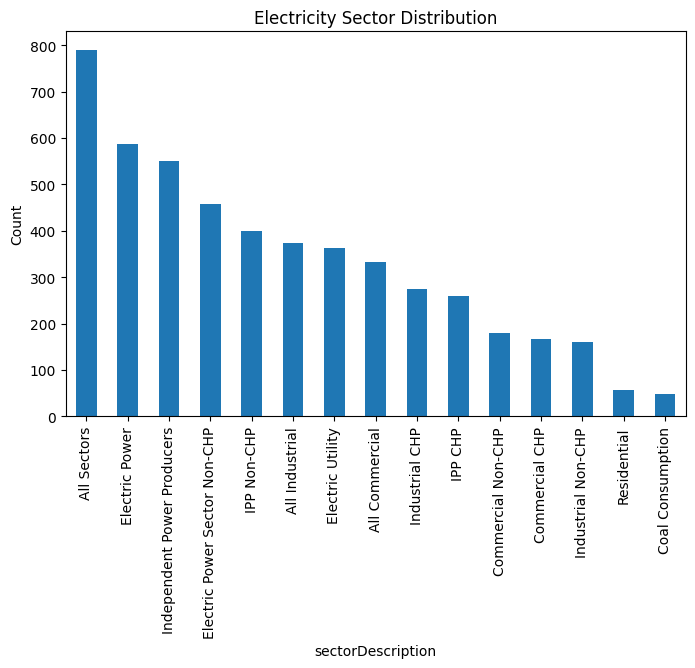

In [11]:
plt.figure(figsize=(8,5))
df["sectorDescription"].value_counts().plot(kind="bar")
plt.title("Electricity Sector Distribution")
plt.ylabel("Count")
plt.show()


In [12]:
fuel_by_state = pd.crosstab(
    df["stateDescription"],
    df["fuelTypeDescription"]
)

fuel_by_state.head()


fuelTypeDescription,all coal products,all fuels,all renewables,anthracite coal,biogenic municipal solid waste,biomass,bituminous coal,bituminous coal and synthetic coal,"coal, excluding waste coal",conventional hydroelectric,...,renewable waste products,residual fuel oil,solar,solar photovoltaic,solar thermal,subbituminous coal,waste coal,waste oil and other oils,wind,wood and wood wastes
stateDescription,,,,,,,,,,,,,,,,,,,,,
Alabama,3,4,3,0,0,4,2,2,3,2,...,3,1,2,3,0,2,0,1,0,1
Alaska,3,5,4,0,0,10,0,0,2,3,...,4,0,1,1,0,4,0,2,1,3
Arizona,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
Arkansas,1,2,2,0,0,1,1,1,1,0,...,1,0,1,1,0,0,0,0,0,0
California,1,6,6,0,2,11,2,2,2,2,...,5,2,6,7,0,0,0,3,3,3


In [13]:
fuel_by_state_norm = fuel_by_state.div(fuel_by_state.sum(axis=1), axis=0)
fuel_by_state_norm.head()


fuelTypeDescription,all coal products,all fuels,all renewables,anthracite coal,biogenic municipal solid waste,biomass,bituminous coal,bituminous coal and synthetic coal,"coal, excluding waste coal",conventional hydroelectric,...,renewable waste products,residual fuel oil,solar,solar photovoltaic,solar thermal,subbituminous coal,waste coal,waste oil and other oils,wind,wood and wood wastes
stateDescription,,,,,,,,,,,,,,,,,,,,,
Alabama,0.033333,0.044444,0.033333,0.0,0.000000,0.044444,0.022222,0.022222,0.033333,0.022222,...,0.033333,0.011111,0.022222,0.033333,0.0,0.022222,0.0,0.011111,0.000000,0.011111
Alaska,0.027523,0.045872,0.036697,0.0,0.000000,0.091743,0.000000,0.000000,0.018349,0.027523,...,0.036697,0.000000,0.009174,0.009174,0.0,0.036697,0.0,0.018349,0.009174,0.027523
Arizona,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.200000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.200000,0.200000
Arkansas,0.071429,0.142857,0.142857,0.0,0.000000,0.071429,0.071429,0.071429,0.071429,0.000000,...,0.071429,0.000000,0.071429,0.071429,0.0,0.000000,0.0,0.000000,0.000000,0.000000
California,0.007874,0.047244,0.047244,0.0,0.015748,0.086614,0.015748,0.015748,0.015748,0.015748,...,0.039370,0.015748,0.047244,0.055118,0.0,0.000000,0.0,0.023622,0.023622,0.023622


In [14]:
fuel_time = (
    df.groupby(["period", "fuelTypeDescription"])
      .size()
      .reset_index(name="count")
)

fuel_time.head()


,period,fuelTypeDescription,count
0,2024-05-01,all coal products,117
1,2024-05-01,all fuels,239
2,2024-05-01,all renewables,202
3,2024-05-01,anthracite coal,9
4,2024-05-01,biogenic municipal solid waste,46


In [15]:
fuel_mix = fuel_time.pivot_table(
    index="period",
    columns="fuelTypeDescription",
    values="count",
    fill_value=0
)

fuel_mix.head()


fuelTypeDescription,all coal products,all fuels,all renewables,anthracite coal,biogenic municipal solid waste,biomass,bituminous coal,bituminous coal and synthetic coal,"coal, excluding waste coal",conventional hydroelectric,...,renewable waste products,residual fuel oil,solar,solar photovoltaic,solar thermal,subbituminous coal,waste coal,waste oil and other oils,wind,wood and wood wastes
period,,,,,,,,,,,,,,,,,,,,,
2024-05-01,117.0,239.0,202.0,9.0,46.0,374.0,93.0,96.0,117.0,120.0,...,157.0,99.0,154.0,157.0,9.0,78.0,35.0,105.0,122.0,104.0
